# Solow model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [164]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject
from modelproject import SolowModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Solow Growth Model

**Introduction to the Solow Growth Model**

The Solow Growth Model is a foundational framework in macroeconomics to understand the long-term determinants of economic growth. It emphasizes how the accumulation of capital, labor growth, and technological advancements drive output levels in an economy.

**Mathematical Representation:**
The model is typically expressed by the differential equation:

$$
\frac{dK}{dt} = sY - \delta K,
$$

where
- \( K \) is the capital stock,
- \( Y \) is total output,
- \( s \) is the savings rate,
- \( \delta \) is the depreciation rate of capital.

Output \( Y \) is determined by a production function often assumed to be Cobb-Douglas:

$$
Y = A K^\alpha L^{1-\alpha},
$$

here
- \( A \) represents technology level,
- \( L \) is labor,
- \( \alpha \) is the output elasticity of capital.

**Purpose of the Model:**
The Solow model is used to analyze the steady-state equilibrium where the economy no longer grows, allowing economists and policymakers to infer the impact of changes in parameters like savings rates, population growth rates, and advancements in technology on the economic steady state.


## Scenario Analyses

**1. Basic Simulation**
The basic simulation scenario establishes a baseline for understanding the dynamics of the Solow model with standard parameter values. This scenario helps illustrate the natural progression of an economy under constant savings rates, labor growth, and technological advancement.
Parameters used: 
- Savings rate (s): 0.3
- Depreciation rate (delta): 0.05
- Labor growth rate (n): 0.01
- Technological growth rate (g): 0.02

**Conclusion:**
The basic simulation shows steady capital accumulation and moderate economic growth, demonstrating the fundamental mechanics of the Solow growth model. This scenario serves as a reference point for evaluating the impacts of variations in model parameters.


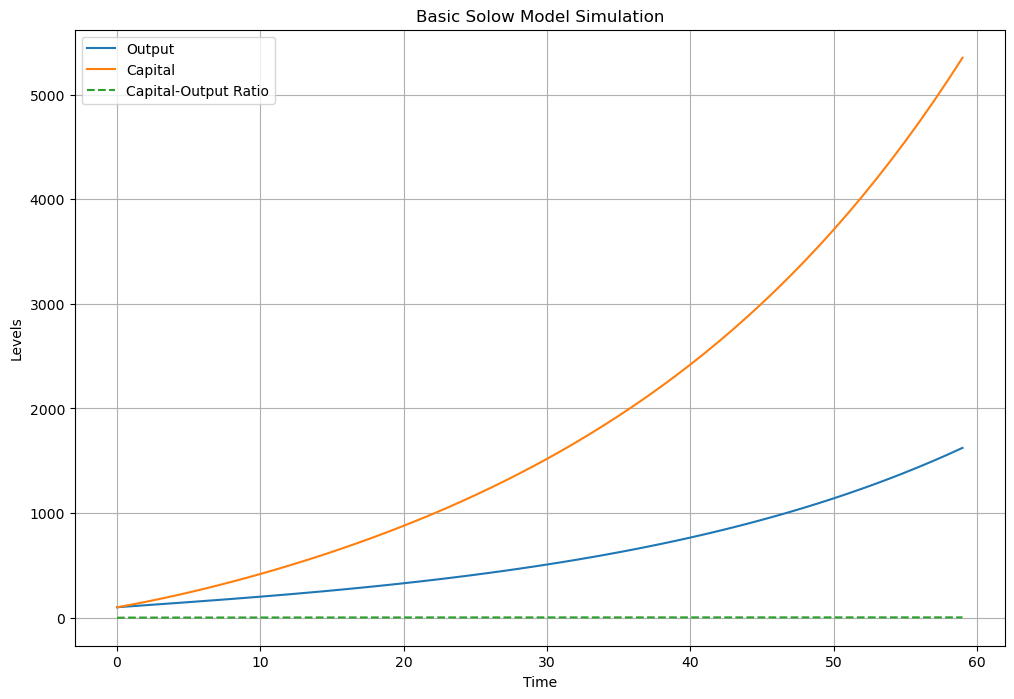

In [165]:
model = SolowModel()
model.simulate()
model.plot_results("Basic Solow Model Simulation")

**2. High Technological Growth**
This scenario explores the impact of a high technological growth rate on the economy, reflecting situations where rapid technological innovations occur.
Parameters used:
- Technological growth rate (g): 0.05 (increased from the baseline of 0.02)


**Conclusion:**
High technological growth leads to significantly enhanced output and faster capital accumulation. It underscores the pivotal role of technological advancements in driving economic growth and improving living standards.


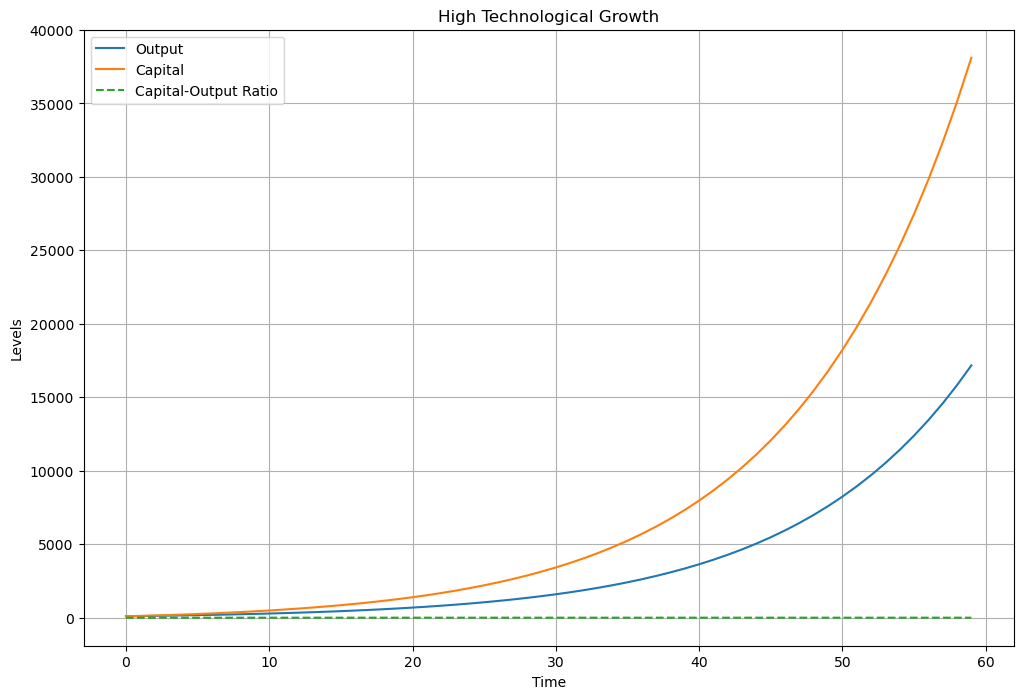

In [166]:
high_tech_growth_model = SolowModel(g=0.05)
high_tech_growth_model.simulate()
high_tech_growth_model.plot_results("High Technological Growth")

**3. Low Technological Growth**
Contrasting the high growth scenario, this simulation examines the effects of lower technological growth rates, akin to economies experiencing slow technological development.
Parameters used:
- Technological growth rate (g): 0.01 (decreased from the baseline of 0.02)

**Conclusion:**
The low technological growth results in slower economic expansion and a gradual increase in capital and output. This scenario highlights the risks of technological stagnation, where an economy might lag in competitive economic development.


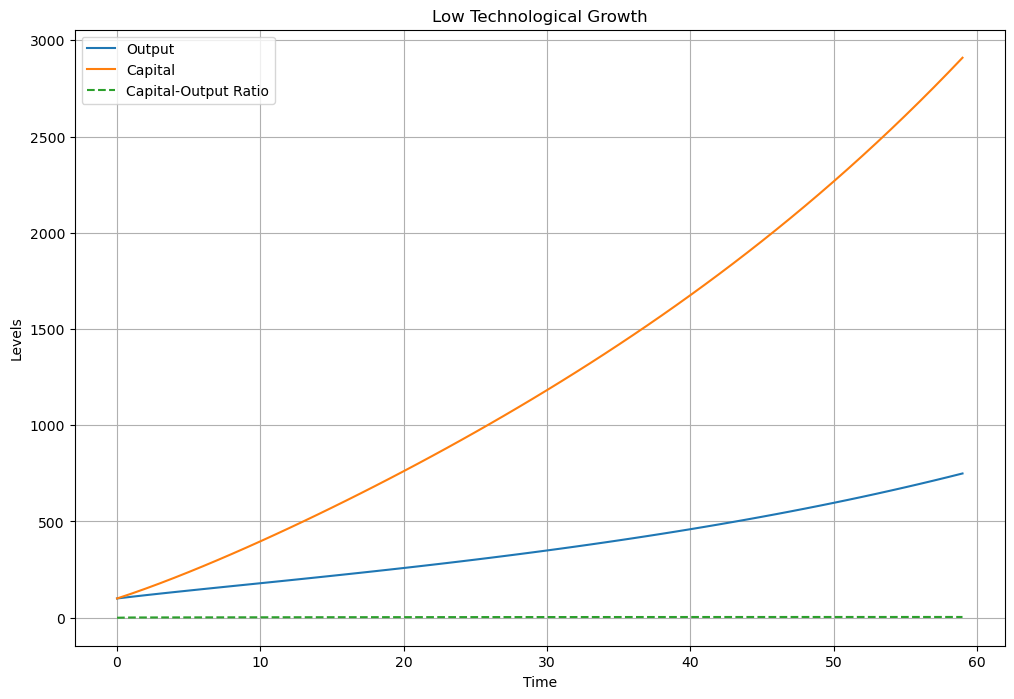

In [167]:
low_tech_growth_model = SolowModel(g=0.01)
low_tech_growth_model.simulate()
low_tech_growth_model.plot_results("Low Technological Growth")

**4. Aging Population**
Simulating an aging population involves setting a negative labor growth rate, reflecting demographic trends seen in many developed countries today.

Parameters used:
- Labor growth rate (n): -0.01 (negative, simulating an aging population)

**Conclusion:**
An aging population significantly dampens economic growth due to a shrinking workforce, despite ongoing capital accumulation. This scenario is crucial for understanding the long-term economic challenges posed by demographic shifts.


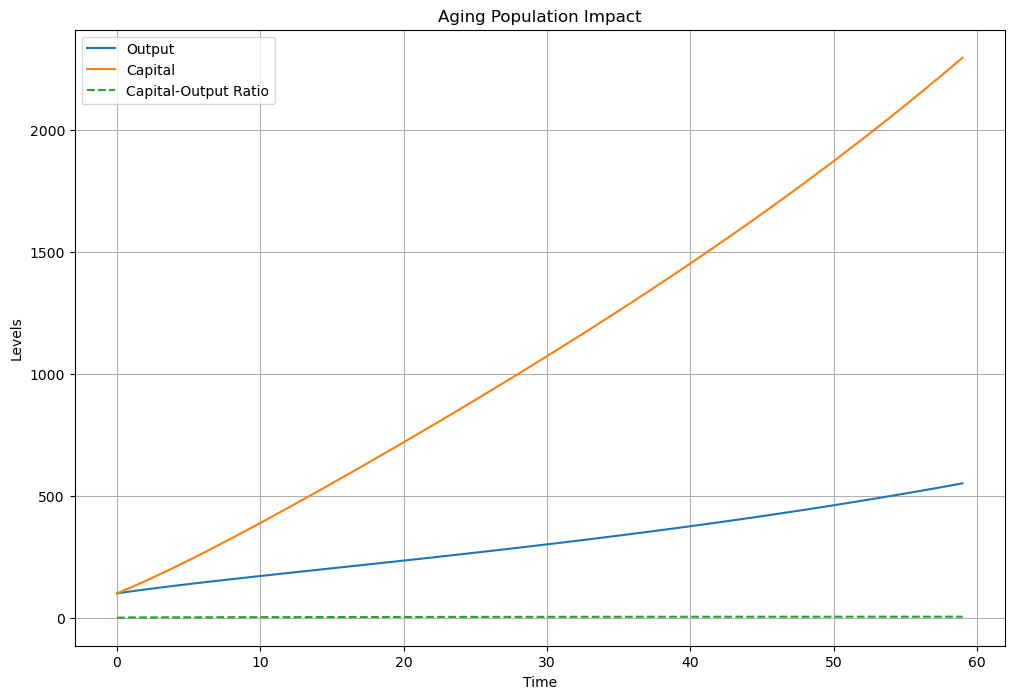

In [168]:
aging_population_model = SolowModel(n=-0.01)
aging_population_model.simulate()
aging_population_model.plot_results("Aging Population Impact")

**5. Policy Shock**
A policy shock is introduced by temporarily increasing the depreciation rate, simulating the effect of sudden government policy changes such as an increase in taxes on capital.

Parameters used:
- Applied policy shock period: At 40th period
- Increase in depreciation rate (delta shock): +0.15 (temporary increase)

**Conclusion:**
The introduction of a policy shock illustrates the short-term negative impacts on capital stock and output, followed by a period of adjustment as the economy adapts to new conditions. This analysis is valuable for policymakers to understand the immediate and residual effects of economic interventions.

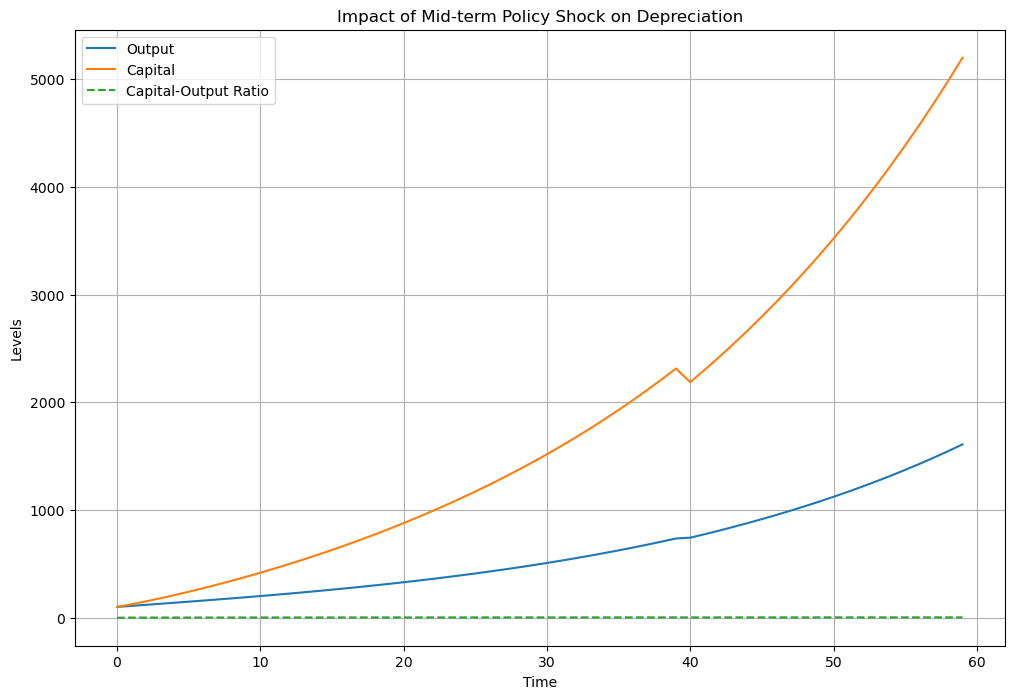

In [169]:
policy_shock_model = SolowModel()
policy_shock_model.simulate(policy_shock_period=40, policy_shock_delta=0.10)
policy_shock_model.plot_results("Impact of Mid-term Policy Shock on Depreciation")

# Conclusion

Throughout this project, we explored the dynamics of the Solow Growth Model by simulating various economic scenarios. The model’s robust framework allowed us to understand the critical roles of capital accumulation, labor growth, technological advancement, and policy interventions in shaping long-term economic growth.